In [0]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train.csv to train.csv
User uploaded file "train.csv" with length 73297027 bytes


In [60]:
newsData = pd.read_csv("train.csv")
newsData.head()

,label,title,text
0,news,China and Economic Reform: Xi Jinping’s Track ...,Economists generally agree: China must overhau...
1,news,Trade to Be a Big Topic in Theresa May’s U.S. ...,LONDON—British Prime Minister Theresa May said...
2,clickbait,"The Top Beaches In The World, According To Nat...",Beaches come in all sorts of shapes and sizes ...
3,clickbait,Sheriff’s Report Provides New Details on Tamir...,"A timeline of what happened after Tamir Rice, ..."
4,news,Surgeon claiming he will transplant volunteer'...,An Italian neurosurgeon who has claimed for mo...


In [61]:
newsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24871 entries, 0 to 24870
Data columns (total 3 columns):
label    24871 non-null object
title    19947 non-null object
text     24788 non-null object
dtypes: object(3)
memory usage: 583.0+ KB


In [62]:
newsData.label.unique()

array(['news', 'clickbait', 'other'], dtype=object)

In [0]:
#removing all rows with unspecified label
newsData = newsData[newsData.label != 'other']

In [64]:
newsData.label.unique()

array(['news', 'clickbait'], dtype=object)

In [65]:
newsData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18398 entries, 0 to 24870
Data columns (total 3 columns):
label    18398 non-null object
title    18398 non-null object
text     18330 non-null object
dtypes: object(3)
memory usage: 574.9+ KB


In [66]:
#Cleaning the remaining data
newsData = newsData.dropna(axis=0)
newsData.reset_index(drop=True, inplace=True)
newsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18330 entries, 0 to 18329
Data columns (total 3 columns):
label    18330 non-null object
title    18330 non-null object
text     18330 non-null object
dtypes: object(3)
memory usage: 429.7+ KB


In [0]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier

In [0]:
## Create a pipeline
clf = Pipeline([('vect', CountVectorizer()), 
                ('tfidf', TfidfTransformer()), 
                ('clf', MultinomialNB())])

In [0]:
X = newsData.title
y = newsData.label

In [70]:
y.head()

0         news
1         news
2    clickbait
3    clickbait
4         news
Name: label, dtype: object

In [0]:
for i in range(18330):
  if y[i]=='clickbait':
    y[i]=True
  else:
    y[i]=False

In [0]:
y=y.astype('bool')

In [77]:
y.head()

0    False
1    False
2     True
3     True
4    False
Name: label, dtype: bool

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

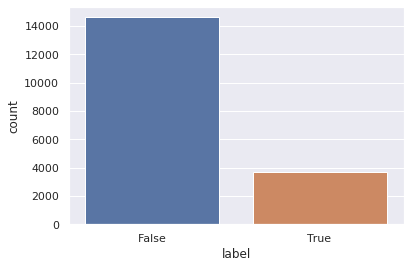

In [79]:
sb.countplot(newsData.label)

In [0]:
clf = clf.fit(X_train, y_train)

In [0]:
from sklearn.metrics import confusion_matrix

Classification Accuracy (Train) 	: 0.8111587982832618
Classification Accuracy (Test)  	: 0.8027492908575169



			Train	Test
True Positive Rate: 	0.0767	0.0228
True Negative Rate: 	0.9992	0.9992
False Positive Rate:	0.0008	0.0008
False Negative Rate:	0.9233	0.9772





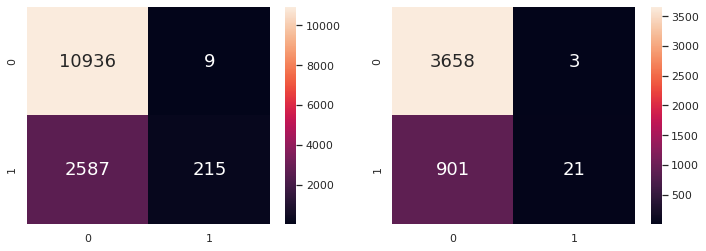

In [82]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print("Classification Accuracy (Train) \t:", clf.score(X_train, y_train))
print("Classification Accuracy (Test)  \t:", clf.score(X_test, y_test))
print("\n\n")
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

trainMat = confusion_matrix(y_train, y_train_pred)
tpTrain, tnTrain, fpTrain, fnTrain = trainMat[1][1], trainMat[0][0], trainMat[0][1], trainMat[1][0]
testMat = confusion_matrix(y_test, y_test_pred)
tpTest, tnTest, fpTest, fnTest = testMat[1][1], testMat[0][0], testMat[0][1], testMat[1][0]
    
fprTrain, fprTest = fpTrain/(tnTrain+fpTrain), fpTest/(tnTest+fpTest)
fnrTrain, fnrTest = fnTrain/(tpTrain+fnTrain), fnTest/(tpTest+fnTest)
tprTrain, tprTest = tpTrain/(tpTrain+fnTrain), tpTest/(tpTest+fnTest)
tnrTrain, tnrTest = tnTrain/(tnTrain+fpTrain), tnTest/(tnTest+fpTest)
    
print("\t\t\tTrain\tTest")
print("True Positive Rate: \t%.4f\t%.4f"%(tprTrain, tprTest))
print("True Negative Rate: \t%.4f\t%.4f"%(tnrTrain, tnrTest))
print("False Positive Rate:\t%.4f\t%.4f"%(fprTrain, fprTest))
print("False Negative Rate:\t%.4f\t%.4f"%(fnrTrain, fnrTest))
print("\n\n")

In [0]:
def testModel(X, y):
  clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,3), min_df=0.0001)), 
                ('clf', MultinomialNB())])
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  clf = clf.fit(X_train, y_train)

  y_train_pred = clf.predict(X_train)
  y_test_pred = clf.predict(X_test)
  print("Classification Accuracy (Train) \t:", clf.score(X_train, y_train))
  print("Classification Accuracy (Test)  \t:", clf.score(X_test, y_test))
  print("\n\n")
  f, axes = plt.subplots(1, 2, figsize=(12, 4))
  sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
  sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

  trainMat = confusion_matrix(y_train, y_train_pred)
  tpTrain, tnTrain, fpTrain, fnTrain = trainMat[1][1], trainMat[0][0], trainMat[0][1], trainMat[1][0]
  testMat = confusion_matrix(y_test, y_test_pred)
  tpTest, tnTest, fpTest, fnTest = testMat[1][1], testMat[0][0], testMat[0][1], testMat[1][0]
    
  fprTrain, fprTest = fpTrain/(tnTrain+fpTrain), fpTest/(tnTest+fpTest)
  fnrTrain, fnrTest = fnTrain/(tpTrain+fnTrain), fnTest/(tpTest+fnTest)
  tprTrain, tprTest = tpTrain/(tpTrain+fnTrain), tpTest/(tpTest+fnTest)
  tnrTrain, tnrTest = tnTrain/(tnTrain+fpTrain), tnTest/(tnTest+fpTest)
    
  print("\t\t\tTrain\tTest")
  print("True Positive Rate: \t%.4f\t%.4f"%(tprTrain, tprTest))
  print("True Negative Rate: \t%.4f\t%.4f"%(tnrTrain, tnrTest))
  print("False Positive Rate:\t%.4f\t%.4f"%(fprTrain, fprTest))
  print("False Negative Rate:\t%.4f\t%.4f"%(fnrTrain, fnrTest))
  print("\n\n")

Classification Accuracy (Train) 	: 0.8889939623190515
Classification Accuracy (Test)  	: 0.7894392319441413



			Train	Test
True Positive Rate: 	0.7901	0.4280
True Negative Rate: 	0.9140	0.8841
False Positive Rate:	0.0860	0.1159
False Negative Rate:	0.2099	0.5720





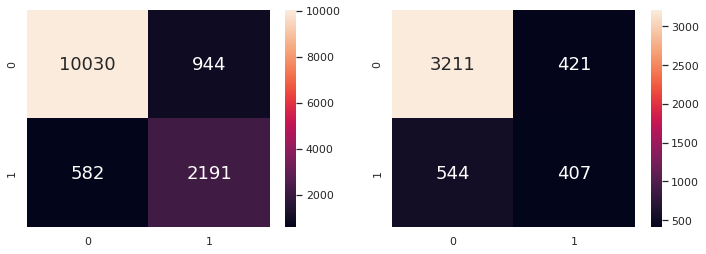

In [269]:
testModel(X, y)

In [175]:
clf.predict(["5 things you didn't know"])

array([ True])

In [0]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from math import log, sqrt
import re
%matplotlib inline

In [0]:
def process_text(text, lower_case = True, stem = True, stop_words = True, gram = 1):
    if lower_case:
        text = text.lower()
    words = word_tokenize(text)
    words = [w for w in words if len(w) > 2]
    if gram > 1:
        w = []
        for i in range(len(words) - gram + 1):
            w += [' '.join(words[i:i + gram])]
        return w
    if stop_words:
        sw = stopwords.words('english')
        words = [word for word in words if word not in sw]
    if stem:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]   
    return words

In [193]:
newsData.head()

,label,title,text
0,False,China and Economic Reform: Xi Jinping’s Track ...,Economists generally agree: China must overhau...
1,False,Trade to Be a Big Topic in Theresa May’s U.S. ...,LONDON—British Prime Minister Theresa May said...
2,True,"The Top Beaches In The World, According To Nat...",Beaches come in all sorts of shapes and sizes ...
3,True,Sheriff’s Report Provides New Details on Tamir...,"A timeline of what happened after Tamir Rice, ..."
4,False,Surgeon claiming he will transplant volunteer'...,An Italian neurosurgeon who has claimed for mo...


In [185]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [214]:
textData = pd.concat([newsData['text'], newsData['label'].reindex(index=newsData['text'].index)], sort = False, axis = 1)
trainData = textData[:13748]
testData = textData[13748:]
trainData.head()

,text,label
0,Economists generally agree: China must overhau...,False
1,LONDON—British Prime Minister Theresa May said...,False
2,Beaches come in all sorts of shapes and sizes ...,True
3,"A timeline of what happened after Tamir Rice, ...",True
4,An Italian neurosurgeon who has claimed for mo...,False


In [215]:
testData.reset_index(drop=True, inplace=True)
testData.head()

,text,label
0,Being a mum may be the most important job in t...,True
1,Just before the administration officially hits...,False
2,Everything happens again. Numbers. Milestones....,True
3,A team of contractors has arrived on Manus Isl...,False
4,The emergence of blockchain technology couldn'...,False


In [223]:
testData.shape

(4582, 2)

In [0]:
class ClickbaitClassifier(object): 
    def __init__(self, trainData, method = 'tf-idf'):
        self.articles, self.labels = trainData['text'], trainData['label']
        self.method = method

    def train(self):
        self.calc_TF_and_IDF()
        if self.method == 'tf-idf':
            self.calc_TF_IDF()
        else:
            self.calc_prob()

    def calc_prob(self):
        self.prob_bait = dict()
        self.prob_safe = dict()
        for word in self.tf_bait:
            self.prob_bait[word] = (self.tf_bait[word] + 1) / (self.bait_words + len(list(self.tf_bait.keys())))
        for word in self.tf_safe:
            self.prob_safe[word] = (self.tf_safe[word] + 1) / (self.safe_words + len(list(self.tf_safe.keys())))
        self.prob_clickbait, self.prob_news = self.clickbait / self.total_articles, self.news / self.total_articles


    def calc_TF_and_IDF(self):
        noOfArticles = self.articles.shape[0]
        self.clickbait, self.news = self.labels.value_counts()[1], self.labels.value_counts()[0] # no. of articles of each type
        self.total_articles = self.clickbait + self.news # same as noOfArticles
        self.bait_words = 0  # count of words in clickbait articles
        self.safe_words = 0  # count of words in news articles
        self.tf_bait = dict()
        self.tf_safe = dict()
        self.idf_bait = dict()
        self.idf_safe = dict()
        for i in range(noOfArticles):
            text_processed = process_text(self.articles[i])  # returns stemmed text without stopwords
            count = list()  # To keep track of whether the word has ocured in an article or not. (For IDF)
            for word in text_processed:
                if self.labels[i]:  # word is in clickbait article
                    self.tf_bait[word] = self.tf_bait.get(word, 0) + 1  # initializes to 1 if it didn't exist before, else incr by 1
                    self.bait_words += 1
                else:
                    self.tf_safe[word] = self.tf_safe.get(word, 0) + 1
                    self.safe_words += 1
                if word not in count:
                    count += [word]
            for word in count:
                if self.labels[i]:
                    self.idf_bait[word] = self.idf_bait.get(word, 0) + 1
                else:
                    self.idf_safe[word] = self.idf_safe.get(word, 0) + 1

    def calc_TF_IDF(self):
        self.prob_bait = dict()
        self.prob_safe = dict()
        self.sum_tf_idf_bait = 0
        self.sum_tf_idf_safe = 0
        for word in self.tf_bait:
            self.prob_bait[word] = (self.tf_bait[word]) * log((self.clickbait + self.news) / (self.idf_bait[word] + self.idf_safe.get(word, 0)))
            self.sum_tf_idf_bait += self.prob_bait[word]
        for word in self.tf_bait:
            self.prob_bait[word] = (self.prob_bait[word] + 1) / (self.sum_tf_idf_bait + len(list(self.prob_bait.keys())))
        for word in self.tf_safe:
            self.prob_safe[word] = (self.tf_safe[word]) * log((self.clickbait + self.news) / (self.idf_bait.get(word, 0) + self.idf_safe[word]))
            self.sum_tf_idf_safe += self.prob_safe[word]
        for word in self.tf_safe:
            self.prob_safe[word] = (self.prob_safe[word] + 1) / (self.sum_tf_idf_safe + len(list(self.prob_safe.keys())))
            
    
        self.prob_clickbait, self.prob_news = self.clickbait / self.total_articles, self.news / self.total_articles 
                    
    def classify(self, processed_text):
        pBait, pSafe = 0, 0
        for word in processed_text:                
            if word in self.prob_bait:
                pBait += log(self.prob_bait[word])
            else:
                if self.method == 'tf-idf':
                    pBait -= log(self.sum_tf_idf_bait + len(list(self.prob_bait.keys())))
                else:
                    pBait -= log(self.bait_words + len(list(self.prob_bait.keys())))
            if word in self.prob_safe:
                pSafe += log(self.prob_safe[word])
            else:
                if self.method == 'tf-idf':
                    pSafe -= log(self.sum_tf_idf_safe + len(list(self.prob_safe.keys()))) 
                else:
                    pSafe -= log(self.safe_words + len(list(self.prob_safe.keys())))
            pBait += log(self.prob_clickbait)
            pSafe += log(self.prob_news)
        return pBait >= pSafe

    def predict(self, testData):
        result = dict()
        for i in range(testData.shape[0]):
            processed_text = process_text(testData['text'][i])
            result[i] = int(self.classify(processed_text))
        return result

In [0]:
sc_tf_idf = ClickbaitClassifier(trainData, 'tf')
sc_tf_idf.train()

In [0]:
preds_tf_idf = sc_tf_idf.predict(testData)

In [240]:
sum=0
for val in preds_tf_idf:
  if val==1:
    sum+=1
print(sum)

1


In [0]:
X2 = newsData.text

Classification Accuracy (Train) 	: 0.9497344875245508
Classification Accuracy (Test)  	: 0.8193323150774602



			Train	Test
True Positive Rate: 	0.9185	0.3838
True Negative Rate: 	0.9576	0.9334
False Positive Rate:	0.0424	0.0666
False Negative Rate:	0.0815	0.6162





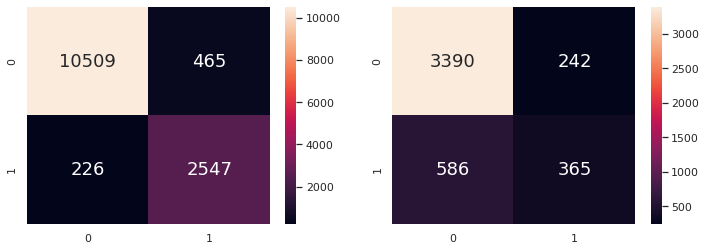

In [256]:
testModel(X2, y)

In [0]:
def doubleModel(newsData):
  clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,3), min_df=0.0001)), 
                ('clf', MultinomialNB())])
  
  X = newsData.title
  y = newsData.label
  y=y.astype('bool')
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  clf = clf.fit(X_train, y_train)

  y_train_title_pred = clf.predict(X_train)
  y_test_title_pred = clf.predict(X_test)
  
  X = newsData.text
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  clf = clf.fit(X_train, y_train)

  y_train_text_pred = clf.predict(X_train)
  y_test_text_pred = clf.predict(X_test)

  y_train_pred = pd.DataFrame(y_train_title_pred | y_train_text_pred)
  y_test_pred = pd.DataFrame(y_test_title_pred | y_test_text_pred)
  f, axes = plt.subplots(1, 2, figsize=(12, 4))
  sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
  sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

  trainMat = confusion_matrix(y_train, y_train_pred)
  tpTrain, tnTrain, fpTrain, fnTrain = trainMat[1][1], trainMat[0][0], trainMat[0][1], trainMat[1][0]
  testMat = confusion_matrix(y_test, y_test_pred)
  tpTest, tnTest, fpTest, fnTest = testMat[1][1], testMat[0][0], testMat[0][1], testMat[1][0]
    
  fprTrain, fprTest = fpTrain/(tnTrain+fpTrain), fpTest/(tnTest+fpTest)
  fnrTrain, fnrTest = fnTrain/(tpTrain+fnTrain), fnTest/(tpTest+fnTest)
  tprTrain, tprTest = tpTrain/(tpTrain+fnTrain), tpTest/(tpTest+fnTest)
  tnrTrain, tnrTest = tnTrain/(tnTrain+fpTrain), tnTest/(tnTest+fpTest)
    
  print("\t\t\tTrain\tTest")
  print("True Positive Rate: \t%.4f\t%.4f"%(tprTrain, tprTest))
  print("True Negative Rate: \t%.4f\t%.4f"%(tnrTrain, tnrTest))
  print("False Positive Rate:\t%.4f\t%.4f"%(fprTrain, fprTest))
  print("False Negative Rate:\t%.4f\t%.4f"%(fnrTrain, fnrTest))
  print("\n\n")

			Train	Test
True Positive Rate: 	0.9520	0.5994
True Negative Rate: 	0.8893	0.8502
False Positive Rate:	0.1107	0.1498
False Negative Rate:	0.0480	0.4006





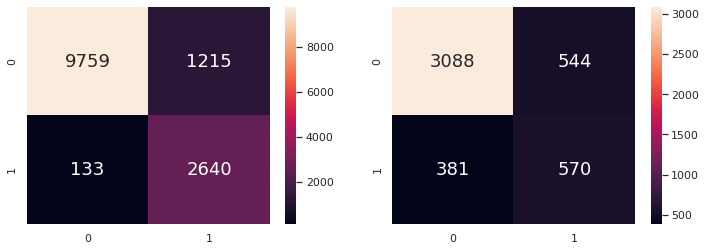

In [271]:
doubleModel(newsData)

In [0]:
df1 = pd.DataFrame({'a':[True, True, False, False]})
df2 = pd.DataFrame({'a':[True, False, True, False]})

In [263]:
df3 = pd.DataFrame(df1 | df2)
df3

,a
0,True
1,True
2,True
3,False
